In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
df_train = pd.read_csv("data/sberbank-russian-housing-market/train.csv")
df_macro = pd.read_csv("data/sberbank-russian-housing-market/macro.csv")

## Features from train.csv only
#### Remove columns with NA's

In [3]:
df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
df_no_nans = df_train.dropna(axis = 1) # remove all columns with NaN's

In [5]:
# for i in df_no_nans.columns:
#     print(i)

In [6]:
df_train_features = df_no_nans[['full_sq','product_type','male_f','female_f','raion_popul',
            'area_m','green_zone_part','indust_part','children_school','school_education_centers_raion',
            'healthcare_centers_raion','sport_objects_raion','shopping_centers_raion','office_raion','work_male',
            'work_female','ekder_male','ekder_female','metro_km_avto','school_km',
            'park_km','green_zone_km','industrial_km','water_treatment_km','cemetery_km',
            'incineration_km','office_km','water_km','railroad_station_avto_km','public_transport_station_km',
            'kremlin_km','big_road1_km','railroad_km','ts_km','big_market_km',
            'market_shop_km','public_healthcare_km','university_km','workplaces_km','shopping_centers_km',
            'market_count_5000','prom_part_3000','cafe_count_5000_na_price','church_count_5000','leisure_count_5000',
            'sport_count_5000','trc_count_5000']]

# cat features: 
#'thermal_power_plant_raion','incineration_raion','oil_chemistry_raion','radiation_raion','railroad_terminal_raion',
 #           'big_market_raion','nuclear_reactor_raion', 'detention_facility_raion', 'culture_objects_top_25'

In [7]:
len(df_train_features.columns)

47

In [8]:
y_train = df_no_nans['price_doc']

In [9]:
X_train = pd.get_dummies(df_train_features)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.28080118436533497

### Remove rows with NA's

In [74]:
df_no_nans_row = df_train.dropna(axis = 0)
# df_no_nans_row = df_train.fillna(0) # remove all columns with NaN's

In [75]:
# for i in df_no_nans_row.columns:
#     print(i)

In [76]:
df_train_features = df_no_nans_row[['full_sq','life_sq','floor','max_floor','material',
                                   'build_year','num_room','kitch_sq','state','product_type',
                                   'area_m','male_f','female_f','raion_popul','green_zone_part',
                                   'indust_part','children_school','school_education_centers_raion','healthcare_centers_raion','sport_objects_raion',
                                   'shopping_centers_raion','office_raion','work_male','work_female','ekder_male',
                                   'ekder_female','metro_km_avto','school_km','park_km','green_zone_km',
                                   'industrial_km','water_treatment_km','cemetery_km','office_km','water_km',
                                   'railroad_station_avto_km','public_transport_station_km','big_road1_km','railroad_km','ts_km',
                                   'big_market_km','market_shop_km','public_healthcare_km','university_km','workplaces_km',
                                   'shopping_centers_km','market_count_1000','prom_part_3000','cafe_count_1000_na_price','church_count_1000',
                                   'leisure_count_1000','trc_count_1000']]

In [77]:
df_train_features.shape[1]

52

In [78]:
X_train = pd.get_dummies(df_train_features)
y_train = df_no_nans_row['price_doc']

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5629331672736545

## 50 Features from train.csv and macro.csv

Highest 40 correlation to price_doc from train.csv.
Highest 10 correlation to price_doc from macro.csv.

In [168]:
df_full = pd.merge(df_train,df_macro, on = 'timestamp')

In [143]:
df_train_nnr = df_train._get_numeric_data().dropna(axis = 0).drop(columns=['id','ID_metro'])

In [144]:
cor_train = df_train_nnr.corr()
cor_target_train = abs(cor_train['price_doc'])
relevant_train_features = cor_target_train[cor_target_train>0.1]

In [181]:
top_40_train_features = list(relevant_train_features.sort_values(ascending = False).index[1:41])

In [182]:
# list of top 40 highest corr. in train.csv
for i in top_40_train_features:
    print(i) 

full_sq
life_sq
num_room
kitch_sq
office_sqm_5000
cafe_count_5000_price_high
cafe_count_5000_price_2500
cafe_count_5000_price_1500
cafe_count_5000
cafe_count_5000_price_1000
cafe_count_5000_price_4000
cafe_sum_5000_min_price_avg
sport_count_5000
cafe_count_5000_na_price
cafe_count_5000_price_500
cafe_avg_price_5000
cafe_sum_5000_max_price_avg
cafe_sum_3000_min_price_avg
office_count_5000
cafe_avg_price_3000
office_sqm_3000
cafe_count_3000_price_high
cafe_sum_3000_max_price_avg
sport_count_3000
leisure_count_5000
office_count_500
church_count_5000
trc_count_5000
office_count_1000
cafe_count_1000_price_high
max_floor
sadovoe_km
sport_count_2000
office_sqm_2000
mkad_km
kremlin_km
cafe_sum_2000_min_price_avg
cafe_count_1500_price_high
bulvar_ring_km
big_church_count_5000


In [120]:
macro_price = df_macro.merge(df_train[['timestamp','price_doc']], on = 'timestamp')

In [124]:
df_macro_nnr = macro_price._get_numeric_data().dropna(axis = 0)
cor_macro = df_macro_nnr.corr()
cor_target_macro = abs(cor_macro['price_doc'])

In [149]:
top_10_macro_features = list(cor_target_macro.sort_values(ascending = False).index[1:11])

In [191]:
# list of top 40 highest corr. in train.csv
for i in top_10_macro_features:
    print(i)

deposits_growth
oil_urals
rent_price_4+room_bus
rent_price_2room_eco
deposits_value
mortgage_rate
rent_price_3room_bus
rent_price_1room_eco
micex_rgbi_tr
micex_cbi_tr


In [184]:
allfeat = top_40_train_features + top_10_macro_features
allfeat.append('price_doc')

In [185]:
raw_full = df_full[allfeat]

In [192]:
raw_full_nn = raw_full_features.dropna(axis=0)

In [193]:
raw_full_nn.head() #Features and response var.

,full_sq,life_sq,num_room,kitch_sq,office_sqm_5000,cafe_count_5000_price_high,cafe_count_5000_price_2500,cafe_count_5000_price_1500,cafe_count_5000,cafe_count_5000_price_1000,...,oil_urals,rent_price_4+room_bus,rent_price_2room_eco,deposits_value,mortgage_rate,rent_price_3room_bus,rent_price_1room_eco,micex_rgbi_tr,micex_cbi_tr,price_doc
7672,73,36.0,2.0,11.0,138650,0,1,11,38,16,...,101.99,139.43,41.30,14738946,12.89,89.07,32.61,140.70,231.82,10100000
8056,11,11.0,1.0,12.0,10742760,26,339,562,2295,537,...,103.34,160.69,40.77,15210054,12.62,87.26,2.31,139.37,233.22,2750000
8135,53,30.0,2.0,8.0,766701,0,10,39,142,43,...,103.34,160.69,40.77,15210054,12.62,87.26,2.31,138.20,233.39,9000000
8154,45,27.0,2.0,6.0,81947,0,2,12,31,5,...,103.34,160.69,40.77,15210054,12.62,87.26,2.31,138.32,233.56,7100000
8175,38,20.0,1.0,8.0,3903973,1,49,53,285,82,...,103.34,160.69,40.77,15210054,12.62,87.26,2.31,138.17,233.51,6450000


In [194]:
X_train = raw_full_nn.drop('price_doc',1)
y_train = raw_full_nn['price_doc']

In [195]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5475225806388361

## Top features from train.csv & macro.csv (no redundant features)

ex: Only 1 cafe_count, Only 1 cafe_sum

In [311]:
df_top_raw = df_full[['full_sq',
'life_sq',
'num_room',
'kitch_sq',
'office_sqm_5000',
'cafe_count_5000_price_high',
'cafe_sum_5000_min_price_avg',
'sport_count_5000',
'cafe_avg_price_5000',
'office_count_5000',
'office_sqm_3000',
'leisure_count_5000',
'church_count_5000',
'trc_count_5000',
'max_floor',
'sadovoe_km',
'mkad_km',
'kremlin_km',
'bulvar_ring_km',
'big_church_count_5000',
'deposits_growth',
'oil_urals',
'rent_price_4+room_bus',
'rent_price_2room_eco',
'deposits_value',
'mortgage_rate',
'rent_price_3room_bus',
'rent_price_1room_eco',
'micex_rgbi_tr',
'micex_cbi_tr',
'price_doc']]

In [312]:
df_top_nn = df_top_raw.dropna(axis=0)
# df_top_nn = df_top_raw.fillna(0)

In [313]:
X_train = df_top_nn.drop('price_doc',1)
y_train = df_top_nn['price_doc'] 

In [314]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)

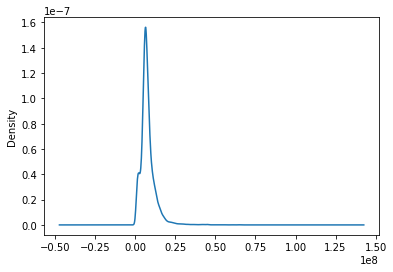

In [315]:
y_train.plot.density()

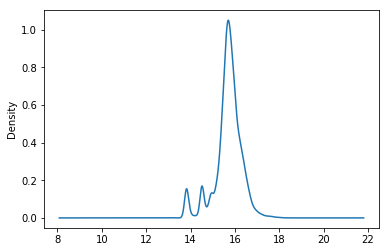

In [316]:
y_train_log = np.log(y_train)
y_train_log.plot.density()

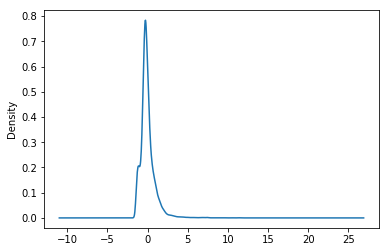

In [317]:
y_train_scaled = (y_train -np.mean(y_train))/np.sqrt(np.var(y_train))
y_train_scaled.plot.density()

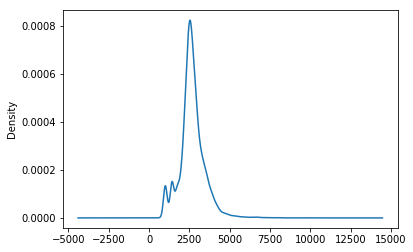

In [318]:
y_train_trans = y_train**(1/2)
y_train_trans.plot.density()

In [319]:
model.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train)

0.5280911982055061